## Popup Bouy (underice buoys)

*POC:* 
- Dan Langis 
- Shaun Bell

The following scripts generate figures for the upcomming publication.
This is to capture most of the look and feel, follow-up editing happens in Adobe Illustrator

In [2]:
import os
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [132]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

### Data Ingestion: from xlsx files.

There are three seperate sample period distinctions
- at bottom
- profiles
- at surface   
These have been place in seperate tabs in the respective excel files

### Corrections applied during analysis

(cal)


Pop-up Prototype A
* Temps of -1.93 are consistent with a freezing point at S = 35. Added 0.1 to T so that temps were near the freezing point of S = 33 (-1.815) **corrected in code in plots below**
* Added 3.65 m to the depths to include all data from the vertical profiles (-3.65 was the minimum depth). **corrected in code in plots below**
* In the profile, use data from 7/17/2015  8:52:33 AM as the first data point (to include bottom data). This is ~ 30 min earlier, but the data looks consistent. ***this change doesn't change plot as all data prior to suface was incorporated***

Pop-up Prototype B - adjustments still being considered.

Pop-up Gen 2 - no adjustments thus far


In [89]:
# data path
dr = '/Users/bell/ecoraid/2017/Additional_FieldData/Popup_Buoys/raw/'
fd = os.listdir(dr)


In [90]:
# Prototype-A Plot
fp = 'Pop-Up Prototype A - ic01-14068.xlsx'
df_protA = pd.read_excel(dr + fp,
                                  sheet_name='ic01-14068',
                                  date_parser=True, 
                                  index_col='Date(UTC)')


### Prototype Timeseries Plots

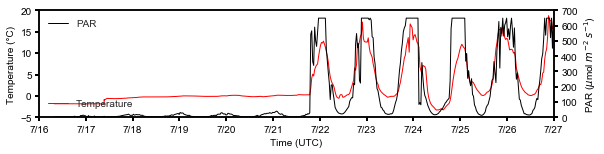

In [139]:
fig, ax = plt.subplots(figsize=(8.5, 2.25))
cs = ax.plot(df_protA.index, df_protA['Temperature(C)']+0.1,'r', linewidth=1,label='Temperature')
ax2 = ax.twinx()
cs = ax2.plot(df_protA.index, df_protA['PAR (umol)'],'k', linewidth=1, label='PAR')
ax.set_xlim([datetime.datetime(2015,7,16),datetime.datetime(2015,7,27)])

xfmt = mdates.DateFormatter('%-m/%d')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
ax.xaxis.set_major_formatter(xfmt)

ax.set_ylim([-5,20])
ax2.set_ylim([0,700])

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(100))

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (°C)') 
ax2.set_ylabel('PAR ($\mu$mol $m^{-2}$ $s^{-1}$)')
ax.legend(loc='lower left')
ax2.legend(loc='upper left')
plt.tight_layout()

fig.savefig('images/fig1.png',dpi=300)
fig.savefig('images/fig1.svg',dpi=300)

### Prototype-Profile Plot

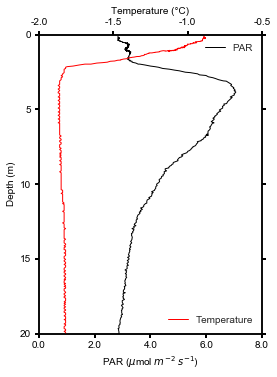

In [147]:
subdata = df_protA[:'2015-07-17 9:22:25']

### Twin X-Axis labeled one on top and one on bottom
fig, ax = plt.subplots(figsize=(4,5.5))
cs = ax.plot(subdata['PAR (umol)'],subdata['Depth(m)']+3.65, 'k', linewidth=1,label='PAR')
ax2 = ax.twiny()
cs2 = ax2.plot(subdata['Temperature(C)']+.1,subdata['Depth(m)']+3.65, 'r', linewidth=1,label='Temperature')

ax2.set_xlim([-2,-0.5])
ax.set_xlim([0,8])
ax2.set_ylim([0,20])

yfmt = mpl.ticker.FormatStrFormatter('%d')
xfmt = mpl.ticker.StrMethodFormatter('{x:.1f}')
ax.xaxis.set_major_formatter(xfmt)
ax.yaxis.set_ticks_position('both')
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax2.yaxis.set_major_formatter(yfmt)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.gca().invert_yaxis()

ax.set_ylabel('Depth (m)')
ax2.set_xlabel('Temperature (°C)') 
ax.set_xlabel('PAR ($\mu$mol $m^{-2}$ $s^{-1}$)') 
ax.legend()
ax2.legend(loc='lower right')
fig.savefig('images/fig2.png',dpi=300)
fig.savefig('images/fig2.svg',dpi=300)

In [39]:
xfmt.fmt

{'x:f'}

Text(0.5,0,'PAR ($\\mu$mol $m^{-2}$ $s^{-1}$)')

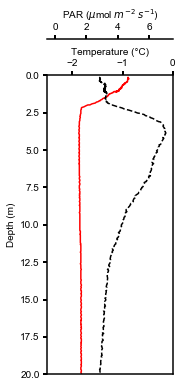

In [148]:
### Alternatively, if we want the axis label on the same side (bottom or top)
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, ax = plt.subplots(figsize=(2.25,5.5))
cs = ax.plot(subdata['Temperature(C)']+0.1,subdata['Depth(m)']+3.65, 'r',label=fp.split('.xlsx')[0])
ax3 = ax.twiny()
ax3.spines["top"].set_position(("axes", 1.12))
make_patch_spines_invisible(ax3)
ax3.spines["top"].set_visible(True)
cs = ax3.plot(subdata['PAR (umol)'],subdata['Depth(m)']+3.65, 'k--',label=fp.split('.xlsx')[0])

ax.set_xlim([-2.5,0])
ax3.set_xlim([-0.5,7.5])
ax.set_ylim([0,20])

plt.gca().invert_yaxis()

ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature (°C)') 
ax3.set_xlabel('PAR ($\mu$mol $m^{-2}$ $s^{-1}$)') 

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx


Text(0,0.5,'Temperature (°C)')

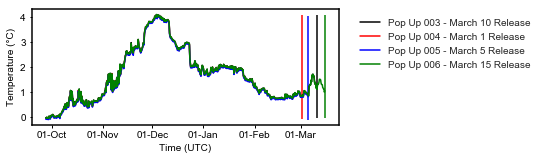

In [94]:
#bottom
df_b = {}

colors = ['b','k','r','b','g','k','g','b']
fig, ax = plt.subplots(figsize=(5.5, 2.125))

for c,fn in enumerate(sorted(fd)):
    if fn not in ['.DS_Store',]:
        try:
            df_b.update({fn:pd.read_excel(dr + fn,sheet_name='Bottom',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            
            cs = ax.plot(df_b[fn].index, df_b[fn]['Temperature (°C)'],colors[c],label=fn.split('.xlsx')[0])
            cs = ax.vlines(df_b[fn].index[-1],df_b[fn]['Temperature (°C)'].min(),df_b[fn]['Temperature (°C)'].max(),colors[c])

            xfmt = mdates.DateFormatter('%d-%b')
            ax.xaxis.set_major_formatter(xfmt)

        except:
            print("Likely no Unit Time Column: {}".format(fn))

ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (°C)')     

**All Bottom timeseries on same plot**

### Profile Plots

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx


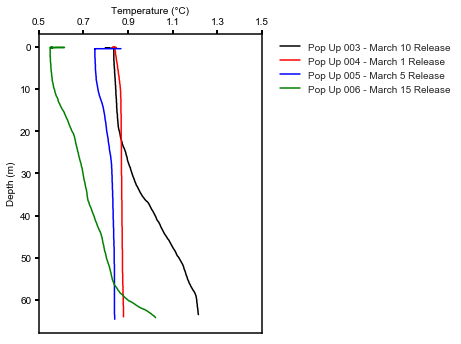

In [135]:
#profiles
df_p = {}

fig, ax = plt.subplots(figsize=(4,5.5))

colors = ['b','k','r','b','g','k','g','b']

for c,fn in enumerate(sorted(fd)):
    if fn not in ['.DS_Store',]:
        try:
            df_p.update({fn:pd.read_excel(dr + fn,
                                  sheet_name='Profile',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            
            cs = ax.plot(df_p[fn]['Temperature (°C)'], -1*df_p[fn]['10 Bar Pressure Sensor (m)'],'k',color=colors[c],label=fn.split('.xlsx')[0])

        except:
            print("Likely no Unit Time Column: {}".format(fn))
            
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlim([0.5,1.5])
xfmt = mpl.ticker.StrMethodFormatter('{x:.1f}')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(ticker.FixedLocator([.5,.7,.9,1.1,1.3,1.5]))
         
plt.gca().invert_yaxis()

ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature (°C)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

fig.savefig('images/fig3.png',dpi=300)
fig.savefig('images/fig3.svg',dpi=300)

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx


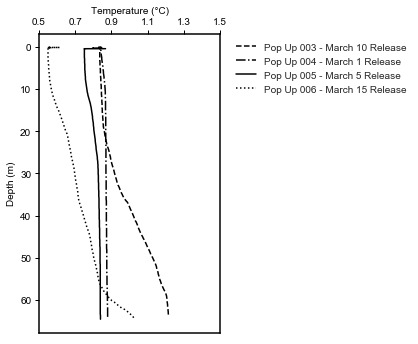

In [131]:
#profiles
df_p = {}

fig, ax = plt.subplots(figsize=(3.25,5.5))

lt= ['-','--','-.','-',':','-','--',':','-']

for c,fn in enumerate(sorted(fd)):
    if fn not in ['.DS_Store',]:
        try:
            df_p.update({fn:pd.read_excel(dr + fn,
                                  sheet_name='Profile',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            
            cs = ax.plot(df_p[fn]['Temperature (°C)'], -1*df_p[fn]['10 Bar Pressure Sensor (m)'],'k',linestyle=lt[c],label=fn.split('.xlsx')[0])

        except:
            print("Likely no Unit Time Column: {}".format(fn))
            

ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlim([0.5,1.5])
xfmt = mpl.ticker.StrMethodFormatter('{x:.1f}')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(ticker.FixedLocator([.5,.7,.9,1.1,1.3,1.5]))
         
plt.gca().invert_yaxis()

ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature (°C)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

In [99]:
#surface
df_s = {}

for fn in fd:
    if fn not in ['.DS_Store',]:
        try:
            df_s.update({fn:pd.read_excel(dr + fn,
                                  sheet_name='Surface',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            #df_s[fn].plot()
        except:
            print("Likely no Unit Time Column: {}".format(fn))
            
     

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx


Text(0.5,0,'PAR ($\\mu$mol $m^{-2}$ $s^{-1}$)')

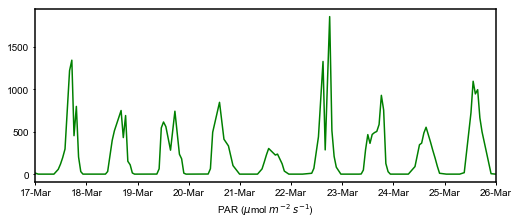

In [100]:
fig, ax = plt.subplots(figsize=(8.25, 3.1875))
cs = ax.plot(df_s['Pop Up 004 - March 1 Release.xlsx'].index,df_s['Pop Up 004 - March 1 Release.xlsx']['PAR       (mmolm-2s-1)'],'g',label=fn.split('.xlsx')[0])

ax.set_xlim([datetime.datetime(2018,3,17),datetime.datetime(2018,3,26)])

xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
ax.xaxis.set_major_formatter(xfmt)

ax.set_xlabel('Time (UTC)')
ax.set_xlabel('PAR ($\mu$mol $m^{-2}$ $s^{-1}$)') 

### Location on GMT-python plot

In [101]:
import gmt

ModuleNotFoundError: No module named 'gmt'

In [102]:
fig = gmt.Figure()


fig.coast(region=[-185, -165, 58, 63], projection='B-175/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

NameError: name 'gmt' is not defined

In [103]:
#color by id for one year
clist=['blue','red','green','black']
count=0
for popup in df_s:
    print(popup)
    fig.plot(x=df_s[popup]['GPS Longitude (degrees)'], 
             y=df_s[popup]['GPS Latitude (degrees)'], color=clist[count], style='p0.05')
    print(clist[count])
    count+=1

Pop Up 005 - March 5 Release.xlsx


AttributeError: 'Figure' object has no attribute 'plot'

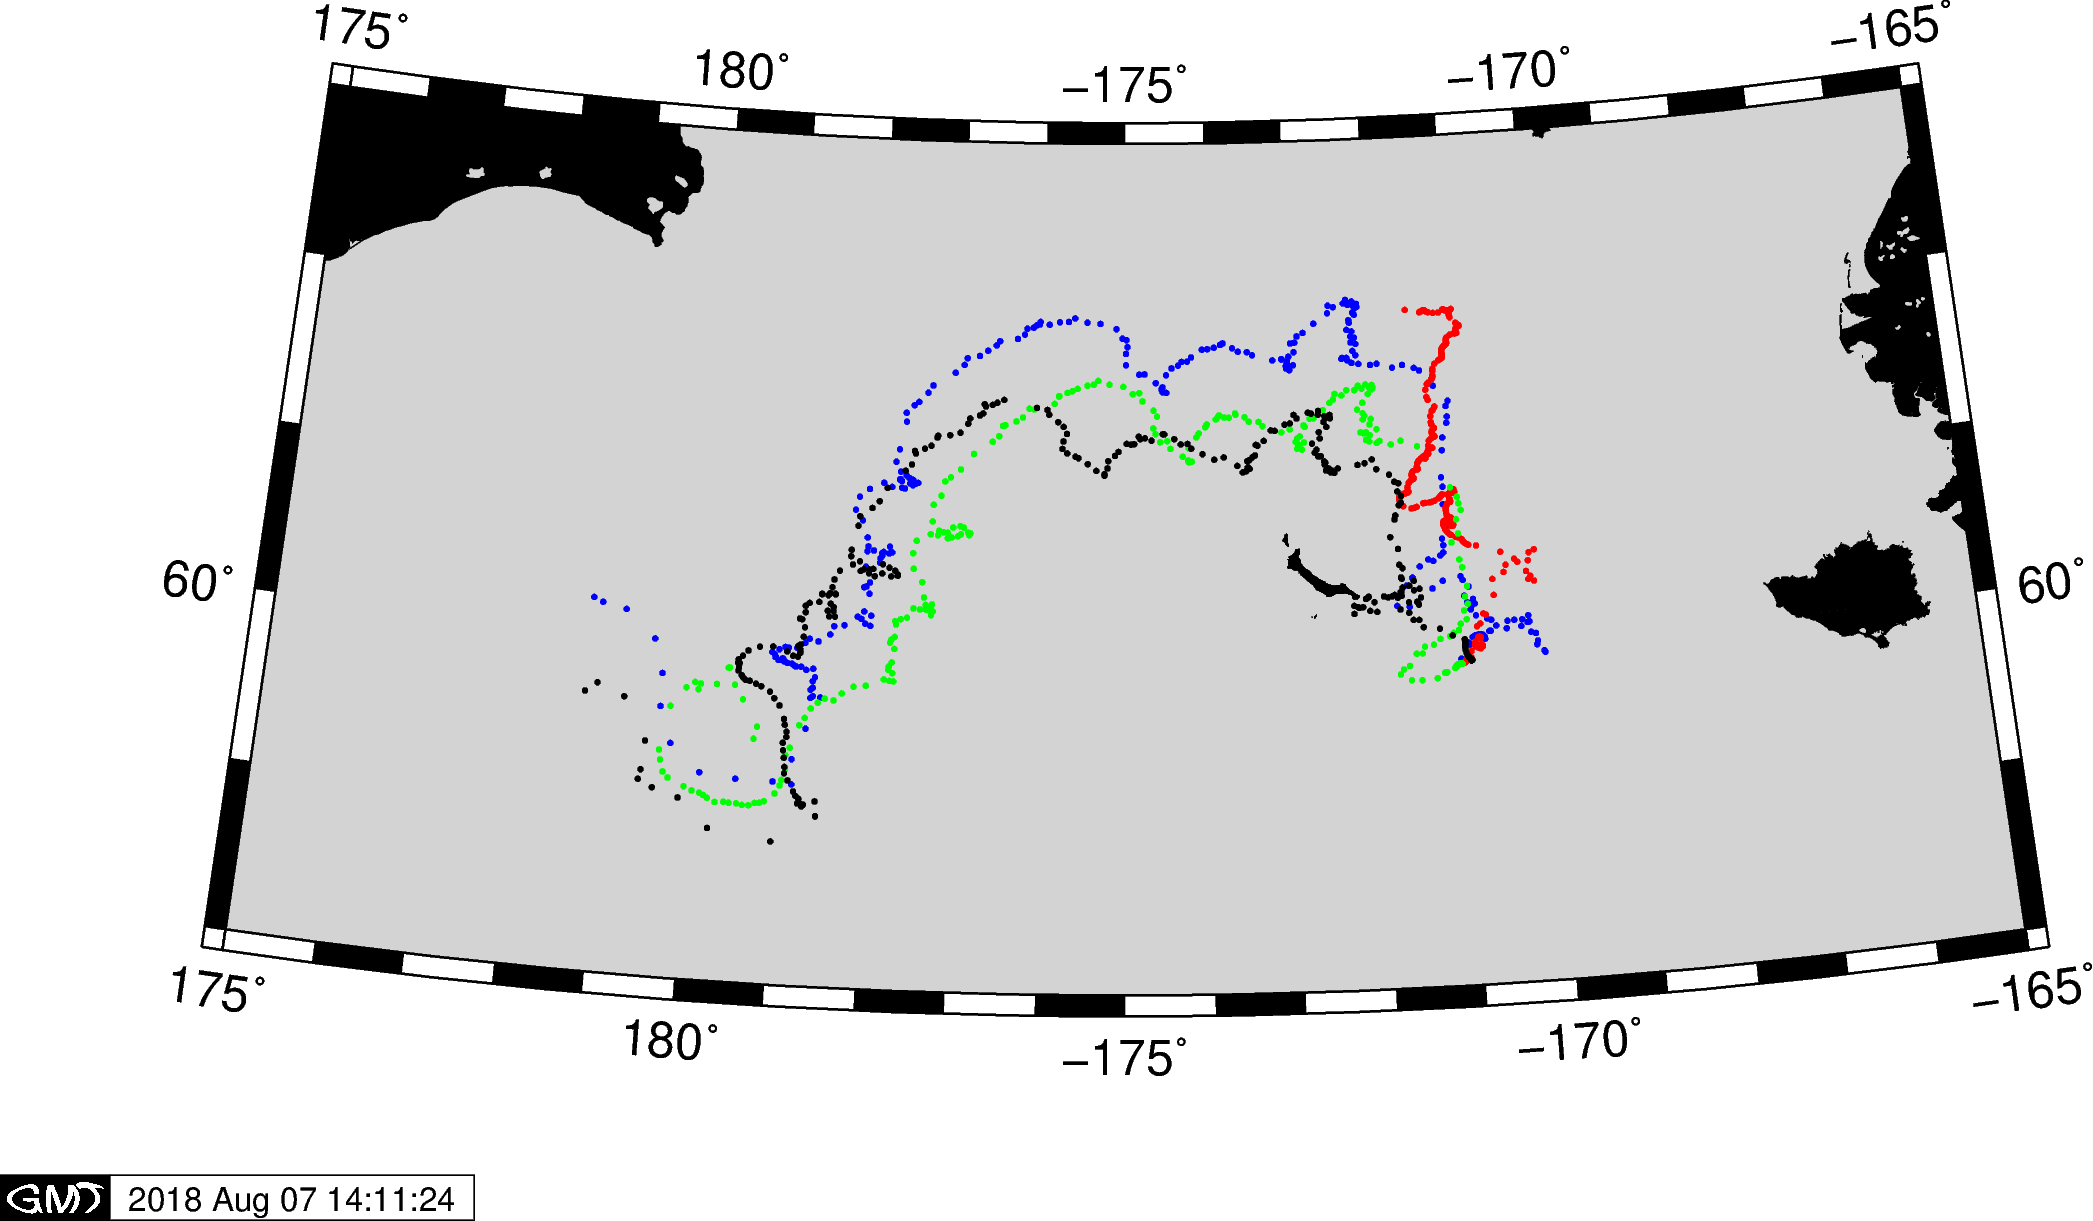

In [15]:
fig.show()

![PopUP_Image](images/PopUpBuoy_2015_coasts.png)

![PopUP_Image](images/PopUp_IceEdge_2015_NorthStar2.png)